In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv(filepath_or_buffer='../DATA/cluster_mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
X = pd.get_dummies(data=df.drop(columns='name'))


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X  = pd.DataFrame(data = scaler.fit_transform(X) , columns=X.columns)

<Figure size 1500x800 with 0 Axes>

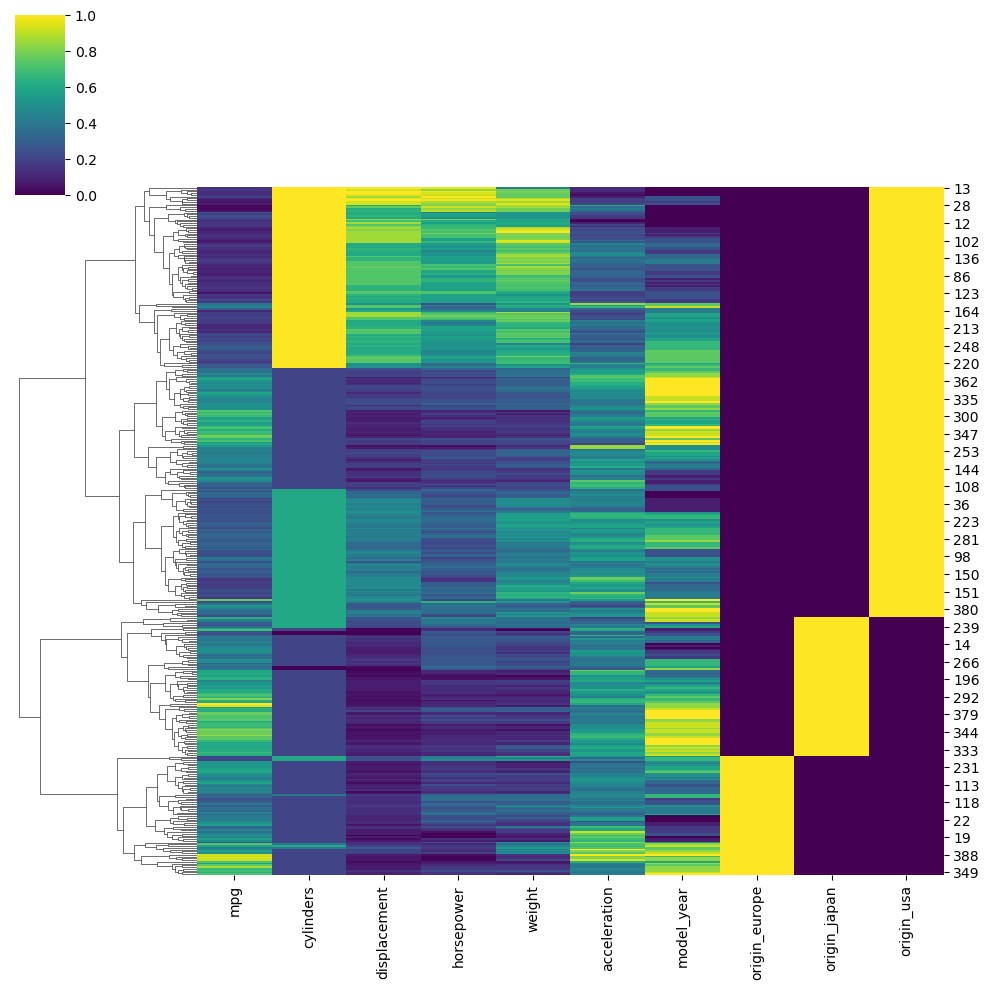

In [15]:
plt.figure(figsize=(15,8))
sns.clustermap(data=X, cmap='viridis', col_cluster=False);

In [59]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4 )

In [60]:
cluster_lable = model.fit_predict(X)

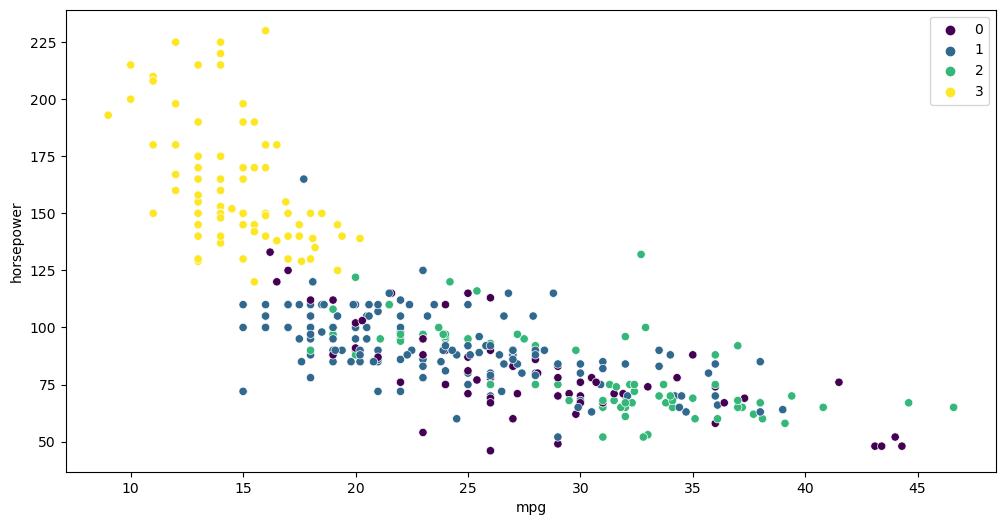

In [61]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='mpg', y='horsepower', hue=cluster_lable, palette='viridis');

In [106]:
model_ = AgglomerativeClustering(n_clusters=None, distance_threshold=2)
model_.fit(X)

AgglomerativeClustering(distance_threshold=2, n_clusters=None)

In [108]:
model_.n_clusters_

11

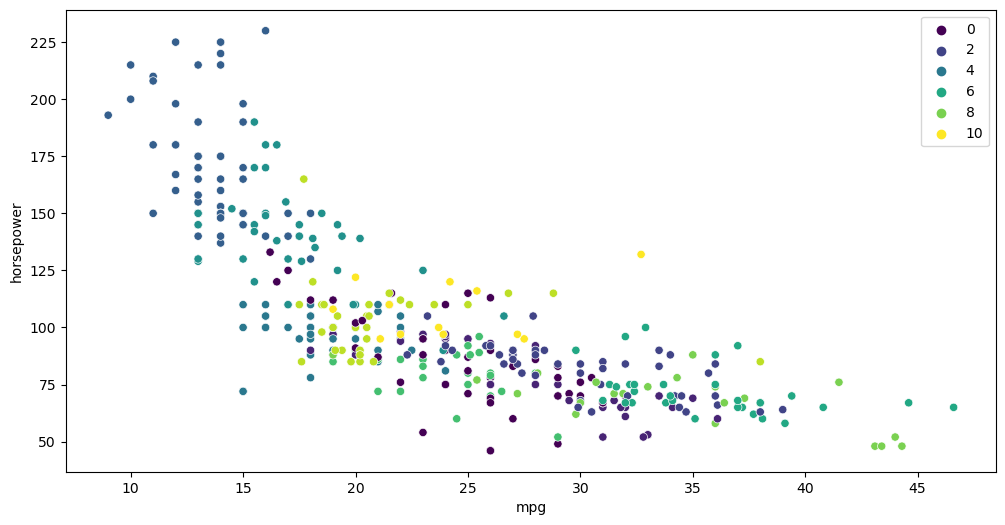

In [109]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='mpg', y='horsepower', hue=model_.fit_predict(X), palette='viridis');

In [110]:
from scipy.cluster.hierarchy import dendrogram , linkage

In [111]:
linkage_mat = linkage(model_.children_)

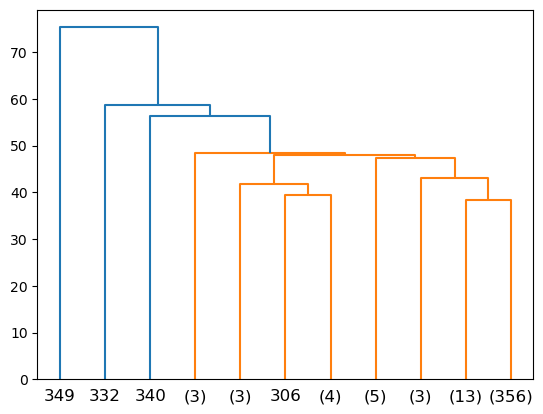

In [113]:
dendrogram(linkage_mat, p=11, truncate_mode='lastp');